# Лабораторная работа №2. Исследовательский анализ данных

## Цель работы

Изучение связи между признаками двумерного набора данных, визуализация данных.

Вариант 11

## Ход выполнения работы

Для начала работы подключается библиотека `pandas`, которая дает возможность работы с данными. Файл с данными был импортирован в среду `Google Colab`. Приступая к работе с библиотекой, выводится первые 20 строк данных с помощью команды `read_csv` и параметра `head()`, выведенные данные имеют разделитель запятую, поэтому параметр `sep` можно не прописывать.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto2.csv')
df.head(20)

,Name,year,SellingPrice,kmdriven,fuel,seller_Type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000.0,125000.0,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000.0,25000.0,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petroll,2014,240000.0,60000.0,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000.0,25000.0,Petroll,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000.0,78000.0,CNG,Individual,Manual,First Owner


С помощью команды `df.info()` оцениваются данные.

В таблице 4344 записи, 3 столбца не заполнены полностью, для каждого столбца указан тип данных, а также указан объем используемой памяти. Так в столбце year используется int для указания года машины, в столбцах SellingPrice и kmdriven float64 для указания цены на машину и пройденных километров, а оставшиеся 5 столбцов используют тип данных object.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4344 non-null   object 
 1   year          4344 non-null   int64  
 2   SellingPrice  4342 non-null   float64
 3   kmdriven      4343 non-null   float64
 4   fuel          4343 non-null   object 
 5   seller_Type   4344 non-null   object 
 6   transmission  4344 non-null   object 
 7   owner         4344 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.6+ KB


Столбцы необходимо привести к одному виду, каждый должен начинаться с большой буквы, без пробелов или подчеркиваний. Поэтому у столбцов year, kmdriven, fuel, seller_Type, transmission, owner меняются названия с помощью команды `df.rename`.

In [ ]:
df = df.rename(columns={
    'year':'Year',
    'sellingprice':'SellingPrice',
    'kmdriven':'KmDriven',
    'fuel':'Fuel',
    'seller_Type':'SellerType',
    'transmission':'Transmission',
    'owner':'Owner'
})

df.columns

Index(['Name', 'Year', 'SellingPrice', 'KmDriven', 'Fuel', 'SellerType',
       'Transmission', 'Owner'],
      dtype='object')

Делается подсчет кол-ва пропусков в каждом столбце. Видно что пропуски есть в столбцах SellingPrice, KmDriven, Fuel.

In [ ]:
df.isna().sum()

,0
Name,0
Year,0
SellingPrice,2
KmDriven,1
Fuel,1
SellerType,0
Transmission,0
Owner,0


Решено оставить все строки, где имеются пропуски кроме SellingPrice и заменить пропуски в KmDriven на 0 (у машины может быть нулевой пробег), в Fuel на 'Other' (автомобиль может работать на альтернативном топливе) В конце проведена проверка на пропуски

In [ ]:
df = df.dropna(subset=[ 'SellingPrice'])
df['KmDriven'] = df['KmDriven'].fillna(0)
df['Fuel'] = df['Fuel'].fillna('Other')
df.isna().sum()

,0
Name,0
Year,0
SellingPrice,0
KmDriven,0
Fuel,0
SellerType,0
Transmission,0
Owner,0


Дублирующиеся строки удаляются и проводится проверка правильности удаления.

Чтобы не было пропусков производится обновление индексации, устанавливается аргумент `drop = True`, чтобы не создавался столбец `Index`.

In [ ]:
df = df.drop_duplicates()
print(df.duplicated().sum())

df = df.reset_index(drop=True)

0


Теперь проводится проверка данных на наличие неявных дубликатов, для этого используем метод `unique()` для столбцов Fuel, SellerType, Transmission, Owner, которые имеют категориальные переменные.

In [ ]:
print(df['Fuel'].unique())
print(df['SellerType'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'Petroll' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Dealeer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


Можно наблюдать повторяющиеся элементы в двух столбцах из четырех. Это исправляется путем задания им одинаковых имен. Код сразу проверяется на правильность.

In [ ]:
df['Fuel'] = df['Fuel'].replace('Petroll','Petrol')
df['SellerType'] = df['SellerType'].replace('Dealeer','Dealer')

print(df['Fuel'].unique())
print(df['SellerType'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3579 entries, 0 to 3578
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          3579 non-null   object 
 1   Year          3579 non-null   int64  
 2   SellingPrice  3579 non-null   float64
 3   KmDriven      3579 non-null   float64
 4   Fuel          3579 non-null   object 
 5   SellerType    3579 non-null   object 
 6   Transmission  3579 non-null   object 
 7   Owner         3579 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 223.8+ KB


Следующий этап - это визуализация и последующий анализ данных.

Следует построить матрицу диаграмм рассеивания. Для этого используется библиотека `seaborn`, а для параметра `hue` берется столбец `Owner`, который имеет 5 категорий: **First Owner, Second Owner, Fourth & Above Owner, Third Owner, Test Drive Car.**

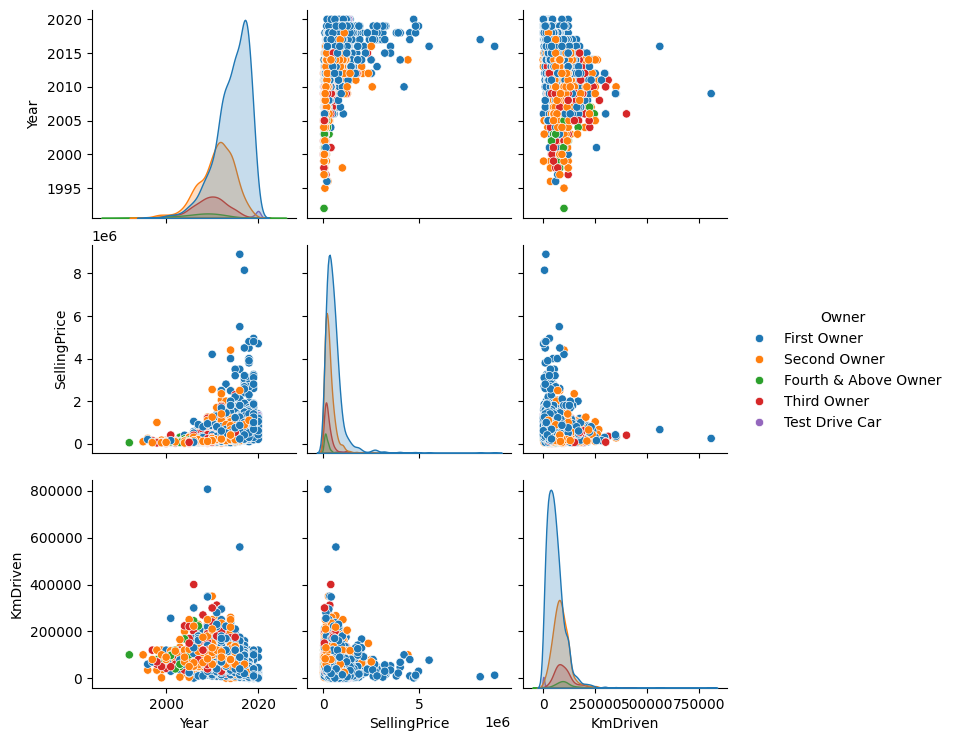

In [ ]:
import seaborn as sns
sns.pairplot(df[['Year','SellingPrice','KmDriven','Owner']], hue="Owner")

Построенные диаграммы выявили следующее:

**Year/SellingPrice:**
*   Чем новее автомобиль (год ближе к 2020-м), тем выше его цена. Это логично, так как автомобили, выпущенные позже, обычно стоят дороже.
* В то же время автомобили, выпущенные до 2000 года, имеют очень низкую цену, что также ожидаемо.

**Year/KmDriven:**
* Более старые автомобили, как правило, имеют больший пробег. Машины, выпущенные до 2000 года, чаще всего проехали более 200 тысяч км.
* Новые машины имеют меньший пробег, что абсолютно логично.

**KmDriven/SellingPrice:**
* Автомобили с большим пробегом обычно дешевле. Это ожидаемо, поскольку больший пробег снижает стоимость автомобиля.
* Некоторые выбросы (очень высокие цены и очень большой пробег) могут указывать на люксовые модели или редкие и коллекционные экземпляры.

Матрица позволяет сделать общие выводы, такие как: большинство автомобилей имеет цену до 1 миллиона, пробег до 200 тысяч км, и их выпуск приходился на последние 10-20 лет. Также матрица показывает, что автомобили с одним или двумя владельцами составляют большинство.

Проверим зависимость данных, для этого исследуем коэффицент корреляции, известно, что положительная корреляция означает увеличение одной переменной связано с увеличением другой
переменной.

*   Ковариация показывает направление взаимосвязи (положительное или отрицательное), но не дает представления о силе связи.

*   Корреляция — это нормализованная ковариация, которая измеряет, насколько сильно и в каком направлении две переменные линейно связаны. Она масштабируется в пределах от -1 до 1


In [ ]:
df.cov(numeric_only=True)

,Year,SellingPrice,KmDriven
Year,18.068811,9.183377e+05,-8.443819e+04
SellingPrice,918337.684169,2.592982e+11,-4.541692e+09
KmDriven,-84438.190268,-4.541692e+09,2.263156e+09


Ковариация между каждой переменной с самой собой является дисперсией этих переменных:

* **Year**: 18.068811 — относительно низкая дисперсия. Это означает, что годы выпуска автомобилей не сильно разбросаны.
* **SellingPrice**: 2.59e+11 — очень высокая дисперсия, указывающая на значительный разброс цен автомобилей.
* **KmDriven**: 2.26e+09 — также большая дисперсия, что указывает на существенные различия в пробегах автомобилей.

Если рассматривать дргуие ковариации то можно сказать, что:
* Между **Year** и **SellingPrice** положительная ковариация(9.18e+05). Это подтверждает положительную связь: чем новее автомобиль (выше значение **"Year"**), тем выше его цена.
* Между **Year** и **KmDriven** имеется отрицательная ковариация(-8.44e+04). Более новые автомобили, как правило, имеют меньший пробег, что также ожидаемо.
* Между **SellingPrice** и **KmDriven** сильная отрицательная ковариация(-4.54e+09). Это означает, что автомобили с большим пробегом, как правило, имеют меньшую цену. Эта связь подтверждает, что пробег оказывает значительное влияние на стоимость автомобиля.


In [ ]:
df.corr(numeric_only=True)

,Year,SellingPrice,KmDriven
Year,1.000000,0.424266,-0.417558
SellingPrice,0.424266,1.000000,-0.187482
KmDriven,-0.417558,-0.187482,1.000000


Матрица корреляции позволяет делать смежные выводы с теми, что были сделаны по матрице ковариации.

* У **Year** и **SellingPrice** *положительная средняя корреляция* (0.424266), что указывает на то, что более новые автомобили (выпущенные в более поздние годы) имеют тенденцию к более высокой цене. Однако, поскольку корреляция не близка к 1, можно сказать, что год выпуска — это не единственный фактор, влияющий на цену.
* У **Year** и **KmDriven** также *средняя корреляция*, но уже *отрицательная* (-0.417558). Она указывает на то, что чем новее автомобиль, тем меньше его пробег. Это подтверждает логичную зависимость, что новые автомобили еще не успели пройти значительное расстояние.
* А **SellingPrice** и **KmDriven** имеют *слабую отрицательную корреляцию* (-0.187482), которая указывает на то, что пробег слабо влияет на цену автомобиля. Хотя существует тенденция, что автомобили с большим пробегом дешевле, связь между пробегом и ценой менее выражена, чем связь между годом выпуска и ценой. Вероятно, на стоимость автомобиля влияют и другие факторы, такие как марка, состояние, комплектация и т.д.

Также, можно сделать вывод по линейным взаимосвязям между переменными и придти к тому, что она присутствует, но только между пробегом и ценой она выражена довольно слабо. А связь между годом и ценой или пробегом и годом выпуска выражена умеренно.

Далее для удобства анализа взаимосвязей между переменными была построена тепловая карта корреляции с использованием библиотеки **seaborn** и библиотеки **matplotlib.pyplot**, которая позволяет настраивать нашу карту, придавая ей размеры, название и другие возможные характеристики. В процессе построения карты были заданы следующие параметры:

* numeric_only=True — учитываются только числовые значения;
* annot=True — отображаются значения коэффициентов корреляции непосредственно на карте;
* cmap='PiYG' — выбор цветовой схемы для отображения данных, была выбрана понравившаяся;
* linewidths=0.5 — добавляет разделение между ячейками для лучшей видимости.


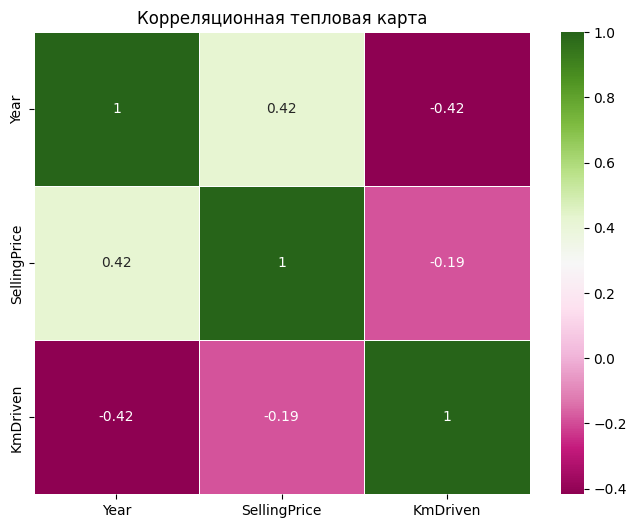

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', linewidths=0.5)
plt.title('Корреляционная тепловая карта')
plt.show()

Тепловая карта позволяет визуально оценить корреляционные зависимости между переменными. Цветовая индикация на карте позволяет быстрее понять, какие переменные имеют сильную положительную или отрицательную корреляцию, и оценить степень этой связи. Более яркие цвета или контрастные оттенки выделяют сильные корреляции (положительные и отрицательные), а более нейтральные — слабые. По карте можно сделать те же самые выводы по связям, что были выше.

### Задание 1

Использовать seaborn. По группировке - fuel и количество машин каждого типа продавца (seller_type) построить диаграмму следующего вида:

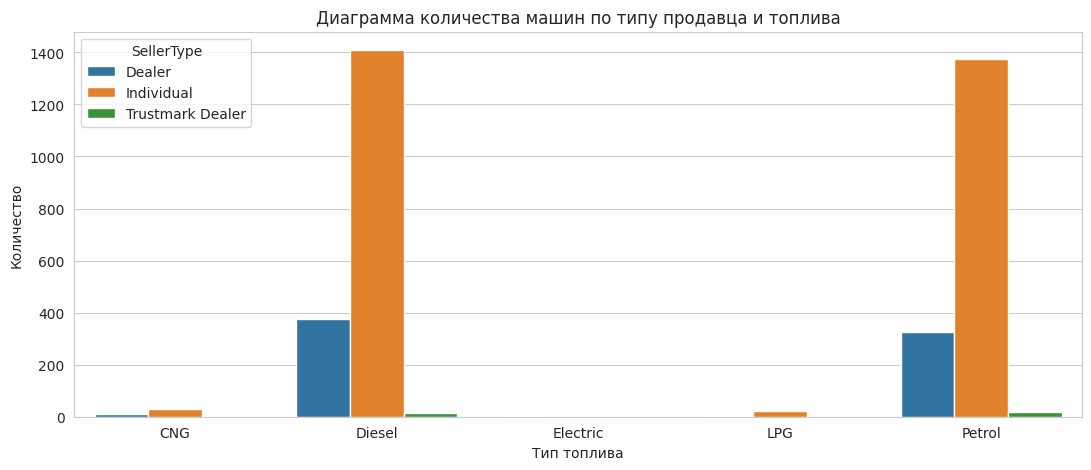

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_new = df.groupby(by=['Fuel', 'SellerType']).size().reset_index(name='Count')
plt.figure(figsize=(13, 5))
sns.set_style('whitegrid')
sns.barplot(x='Fuel', y='Count', hue='SellerType', data=df_new)
plt.title('Диаграмма количества машин по типу продавца и топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Количество')

plt.show()

* Из графика видно, что количество продаваемых дизельных и бензиновых автомобилей почти равны, причем независимо от типа продавца, они также доминируют на рынке. Количество автомобилей с другим видом топлива незначительны и сильно уступают дизелю и бензину.
* В основном автомобили продаются от собственника, что схоже с реальностью. Затем идут автомобили продающиеся от дилера, их количество кратно меньше. Самой немногочисленной группой являются автомобили в продаже от так называемых дилеров с гарантией доверия. Это дилеры, которые соответствуют определенным стандартам качества и надежности, установленным различными организациями или ассоциациями

### Задание 2

Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить максимальную
стоимость по типу владельца (owner). Оставить только маркеры в виде ∎ зелёного цвета размером 14

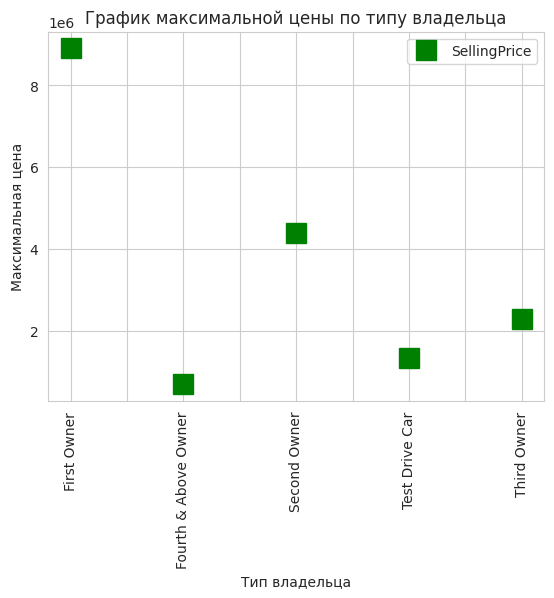

In [ ]:
df.pivot_table(index=['Owner'],
               values = 'SellingPrice',
               aggfunc='max').plot(style='s', markersize = 14, color = 'green', grid=True, ylabel = 'Максимальная цена', xlabel = 'Тип владельца', title ='График максимальной цены по типу владельца')
plt.xticks(rotation=90)
plt.show()

* Исходя из графика видно, как уменьшается максимальная цена на автомобили, исходя из числа владельцев.
* Максимальная цена на автомобиль с тест драйва выше, чем цена на автомобиль с четырьмя и более владельцами.

### Задание 3

Использовать matplotlib. Отфильтровать данные - год больше 2005 Построить круговую диаграмму, которая отображает процент машин по годам (year).

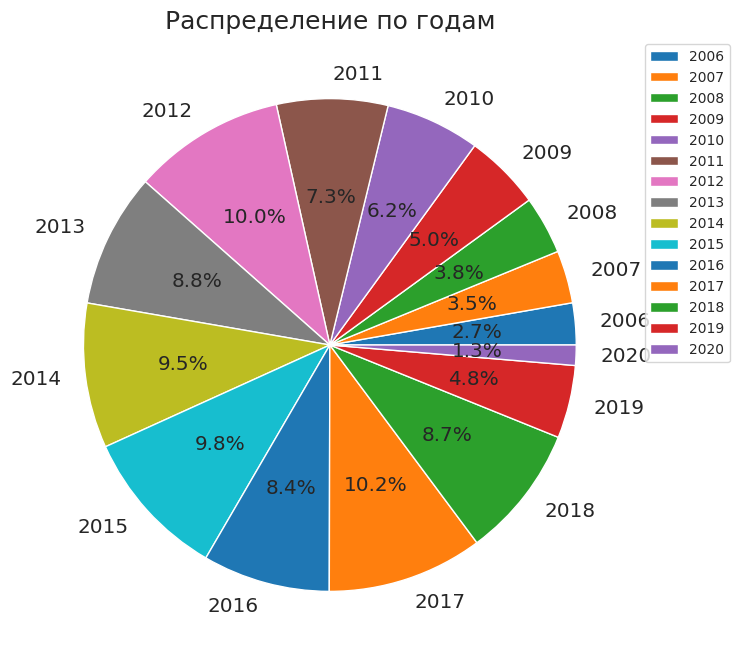

In [ ]:
import matplotlib.pyplot as plt
df_filtered = df[df['Year'] > 2005]
year_counts = df_filtered['Year'].value_counts().sort_index()
plt.figure(figsize=(20, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%.1f%%', textprops={'size': 'x-large'})
plt.legend(year_counts.index, fontsize = 10, bbox_to_anchor=(1, 1))
plt.title("Распределение по годам", fontsize=18)
plt.show()

Заметна тенденция, что с 2006 по 2012 процент автомобилей по немногу растет, затем данная тенденция прерывается и количесто автомобилей остается приблизетельно на одном уровне, зато в последние два года количество автомобилей становится кратно меньше.

## Вывод

В результате выполнения данной лабораторной работы была разработана программа, которая позволила прочитать файл формата .csv и построить различные виды диаграмм на основе данных об автомобилях.

Полученные знания для работы с табличными данными позволили проанализировать информацию о рынке поддержанных авто. Данные включали такие параметры, как год автомобиля, его цена, пробег, тип топлива, тип продавца, вид коробки передач и число владельцев автомобиля. Разнообразие данных позволило всесторонне оценить рынок авто, его наполнение и различные тенденции, зависящие от года авто и числа его владельцев. Так, подтвердились некоторые гипотезы: чем старше автомобиль, тем выше его пробег, но допустим посмотрев на коэффициент корреляции было выяснено, что пробег слабо влияет на цену, она зависит и от дургих факторов.

Выполнение работы позволило приобрести практические навыки работы с библиотеками `seaborn` и `matplotlib`. Были построены диаграммы рассеивания с параметром `hue` для улучшения визуализации данных. Использовались функции для расчета коэффициентов корреляции с помощью метода `corr()`, и на их основе была создана тепловая карта. В рамках индивидуальных заданий также были построены круговые диаграммы и бар-чарты для анализа зависимости вида топлива и количества владельцев, а также количества владельцев и максимальной цены на автомобиль.

По итогу анализа данных было выявлено, что более новые автомобили (выпущенные в более поздние годы) имеют тенденцию к более высокой цене, чем новее автомобиль, тем меньше его пробег, это подтверждает логичную зависимость, что новые автомобили еще не успели пройти значительное расстояние. Пробег слабо влияет на цену автомобиля. Хотя существует тенденция, что автомобили с большим пробегом дешевле, связь между пробегом и ценой менее выражена, чем связь между годом выпуска и ценой. Вероятно, на стоимость автомобиля влияют и другие факторы, которые не упоминаются в данном датасете. Также, количество продаваемых дизельных и бензиновых автомобилей почти равны, причем независимо от типа продавца, они также доминируют на рынке. Количество автомобилей с другим видом топлива незначительны и сильно уступают дизелю и бензину.

 Эти выводы могут быть использованы для помощи в выборе будущего автомобиля для новых покупателей.

## Дополнительное задние

### Задание 1

Построить boxplot SellingPrice по типу топлива

Создается график "boxplot" для отображения распределения данных о цене автомобилей (`SellingPrice`) в зависимости от типа топлива (`Fuel`). Задаются параметры по осям, в качестве набора данных выбирается нужный DataFrame, параметр palette задает цветовую схему графика. Параметры `hue` и `legend` были добавлены для избежания каких-либо ошибок, так как в более новых версиях Seaborn (начиная с 0.14.0) использование параметра palette без указания параметра hue стало устаревшим.

<Axes: xlabel='Fuel', ylabel='SellingPrice'>

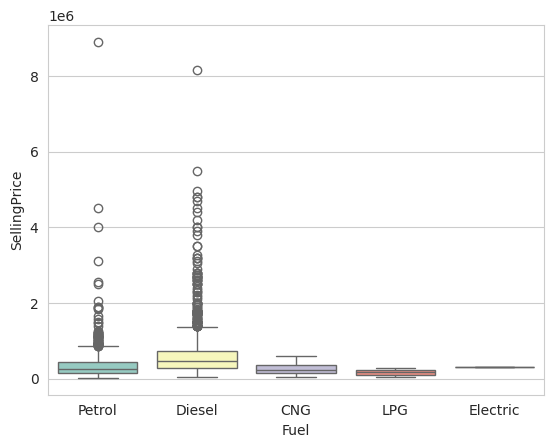

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x='Fuel', y='SellingPrice', data=df, palette='Set3', hue='Fuel', legend=False)

* **Petrol:** Средняя цена для автомобилей с бензиновым двигателем сосредоточена на относительно низком уровне, но наблюдается большое количество выбросов, что указывает на наличие машин с существенно более высокой ценой.
* **Diesel:** У автомобилей с дизельным двигателем средняя цена выше, чем у бензиновых, и также присутствуют выбросы, некоторые из которых достигают высоких значений (до 8 миллионов). Дизельные автомобили имеют большую концентрацию значений в средней части диаграммы, но при этом заметен широкий разброс, что указывает на разнообразие цен.
* **CNG:** Средняя цена для автомобилей на CNG ниже, чем у бензиновых и дизельных автомобилей, с меньшим количеством выбросов и меньшим разбросом значений. Это может говорить о том, что автомобили с CNG имеют более стабильные цены.
* **LPG:** Цены автомобилей на LPG также относительно низкие, с небольшим разбросом и малым количеством выбросов. Это указывает на однородность цен в данной категории топлива.
* **Electric:** У электрических автомобилей цены наиболее стабильны и относительно низки, почти без выбросов и с небольшим разбросом. Это может свидетельствовать о том, что электромобили имеют ограниченную ценовую вариативность, возможно, из-за небольшого разнообразия предложений на рынке в этой категории.

### Задание 2

Построить boxplot по KmDriven по типу владельца

Создается график "boxplot" для отображения распределения данных о пробеге автомобилей (`KmDriven`) в зависимости от типа влад (`Owner`). Задаются параметры по осям, в качестве набора данных выбирается нужный DataFrame, параметр palette задает цветовую схему графика. Параметры `hue` и `legend` были добавлены для избежания каких-либо ошибок, так как в более новых версиях Seaborn (начиная с 0.14.0) использование параметра palette без указания параметра hue стало устаревшим.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'First Owner'),
  Text(1, 0, 'Second Owner'),
  Text(2, 0, 'Fourth & Above Owner'),
  Text(3, 0, 'Third Owner'),
  Text(4, 0, 'Test Drive Car')])

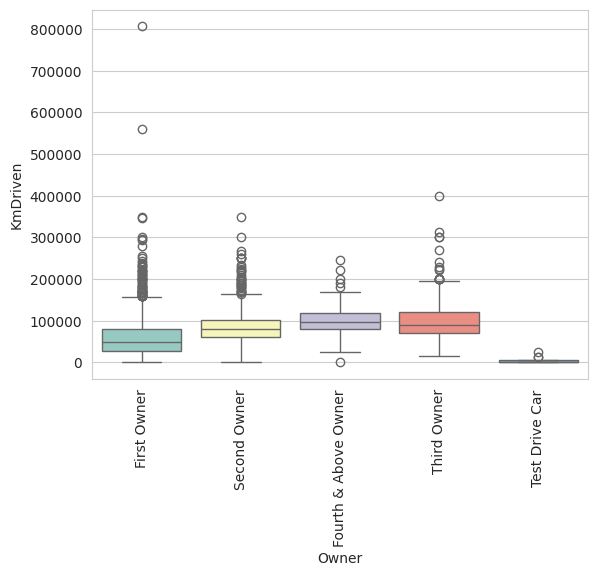

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x='Owner', y='KmDriven', data=df, palette='Set3', hue='Owner', legend=False)
plt.xticks(rotation=90)

* **First Owner:** Средний пробег для автомобилей с одним владельцем относительно низкий по сравнению с другими категориями владельцев. Есть значительное количество выбросов, достигающих 200,000 км и более, что может свидетельствовать о том, что некоторые автомобили, даже с одним владельцем, активно использовались.
* **Second Owner:** Средний пробег у автомобилей с двумя владельцами немного выше, чем у автомобилей с одним владельцем, но при этом диапазон пробега тоже больше. Также наблюдается множество выбросов, причем некоторые из них превышают 300,000 км.
* **Fourth & Above Owner:** Средний пробег в этой категории высокий, с большим диапазоном значений. Высокий пробег ожидаем для автомобилей, которые сменили нескольких владельцев. Выбросы здесь тоже присутствуют, что может указывать на интенсивное использование некоторых машин.
* **Third Owner:** Пробег у автомобилей с тремя владельцами примерно сравним с автомобилями с четырьмя и более владельцами, но наблюдается несколько меньший разброс. Тем не менее, имеются выбросы, включая пробеги более 200,000 км, что типично для старых или часто использовавшихся автомобилей.
* **Test Drive Car:** У автомобилей, используемых для тест-драйвов, средний пробег самый низкий среди всех категорий, что вполне ожидаемо, так как они не предназначены для активного использования. Присутствуют несколько выбросов, но в целом пробег для тест-драйв автомобилей находится на низком уровне.

### Задание 3

Построить boxplot по цене, используя pandas

В Pandas можно создать boxplot (диаграмму размаха) с помощью встроенного метода `.boxplot()`, где в параметрах указывается для какого столбца будет построена диаграмма (`column='SellingPrice'`), отсутствие сетки для лучшей читаемости (`grid=False`), и размер диаграммы (`figsize=(10, 6)`).

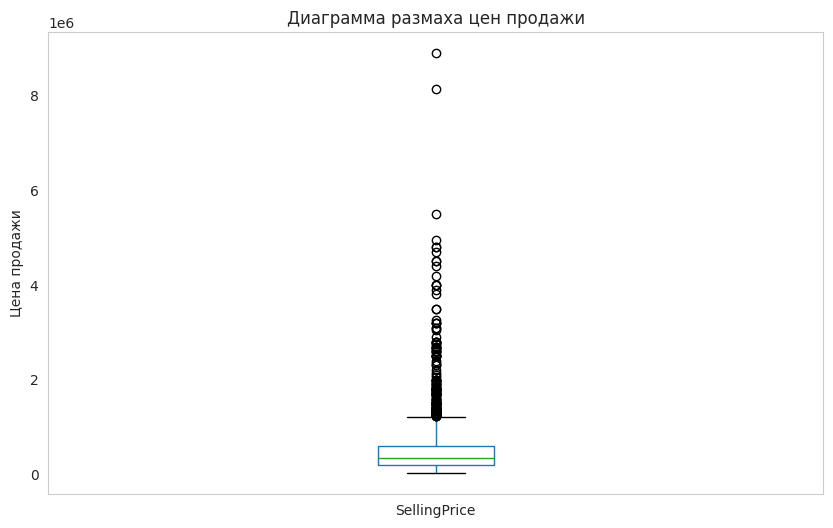

In [ ]:
df.boxplot(column='SellingPrice', grid=False, figsize=(10, 6))
plt.title('Диаграмма размаха цен продажи')
plt.suptitle('')
plt.ylabel('Цена продажи')
plt.show()

На данной диаграмме медиана находится в нижней части диапазона значений, что говорит о том, что большинство значений цены продажи сосредоточено ниже верхнего квартиля. Диапазон межквартильных значений небольшой по сравнению с общим разбросом данных, что говорит о том, что большинство автомобилей продаются по ценам, не сильно отличающимся друг от друга. Присутствует наличие большого числа выбросов, некоторые из которых достигают значений более 4–6 миллионов, что сильно отличается от основной массы данных. Выбросы свидетельствуют о том, что есть редкие, но очень дорогие автомобили. Это могут быть роскошные или эксклюзивные модели.

Диаграмма размаха указывает на наличие большого числа выбросов, представляющих автомобили с высокой ценой продажи, тогда как большинство значений цены сосредоточено на относительно низком уровне. Это может свидетельствовать о широком диапазоне предложений на рынке — от массовых моделей до люксовых автомобилей.

### Задание 4

По группировке - fuel и количество машин каждого типа продавца (seller_type) построить диаграмму следующего вида, используя plotly

Столбчатую диаграмму можно построить не только с помощью `seaborn`, но и используя библиотеку `plotly`, у нее также есть более удобная версия `plotly.express`, которая и была применена. Для построения диаграммы используется метод `.bar()`, параметрами в котором можно указать стиль диаграммы (`barmode='group'`), данные для осей (`x='Fuel', y='Count', color='SellerType'`), название (`title='Диаграмма количества машин по типу продавца и топлива'`) и размеры (`width=1200, height=550`).

In [ ]:
import plotly.express as px

df_new = df.groupby(by=['Fuel', 'SellerType']).size().reset_index(name='Count')
fig = px.bar(df_new, barmode='group', x='Fuel', y='Count', color='SellerType', title='Диаграмма количества машин по типу продавца и топлива', width=1200, height=550)

fig.show()

Из данной диаграммы можно сделать такие же выводы, а именно:
* Из графика видно, что количество продаваемых дизельных и бензиновых автомобилей почти равны, причем независимо от типа продавца, они также доминируют на рынке. Количество автомобилей с другим видом топлива незначительны и сильно уступают дизелю и бензину.
* В основном автомобили продаются от собственника, что схоже с реальностью. Затем идут автомобили продающиеся от дилера, их количество кратно меньше. Самой немногочисленной группой являются автомобили в продаже от так называемых дилеров с гарантией доверия. Это дилеры, которые соответствуют определенным стандартам качества и надежности, установленным различными организациями или ассоциациями